In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math

In [117]:
pwd

'/Users/shardulsathe/Desktop/AIML/Month2 - Supervised Learning/Project'

In [118]:
ls

Applied Stats problem statement.docx.pdf
Insurance_Project_EDA_HypothesisTesting.ipynb
insurance.csv


In [119]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
insurance_df.shape

(1338, 7)

There are 7 features and 1338 observations

In [121]:
insurance_df.info() #data type of each attribute and info on missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
insurance_df.describe(include='all') #5 point summary

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [123]:
pd.value_counts(insurance_df['sex'])

male      676
female    662
Name: sex, dtype: int64

In [124]:
pd.value_counts(insurance_df['smoker'])

no     1064
yes     274
Name: smoker, dtype: int64

In [125]:
pd.value_counts(insurance_df['region'])

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

There are no missing values. Let's plot the variables graphically 

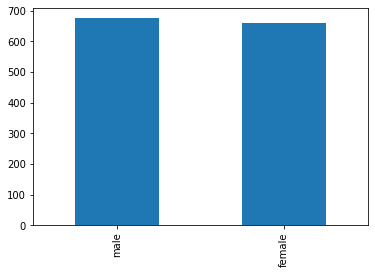

In [126]:
pd.value_counts(insurance_df['sex']).plot(kind='bar')

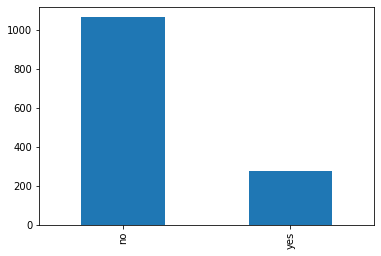

In [127]:
pd.value_counts(insurance_df['smoker']).plot(kind='bar')

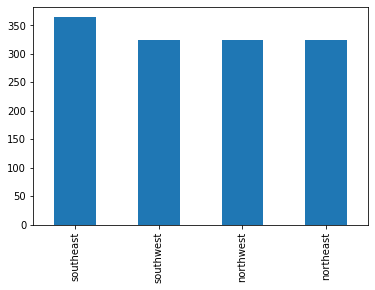

In [128]:
pd.value_counts(insurance_df['region']).plot(kind='bar')

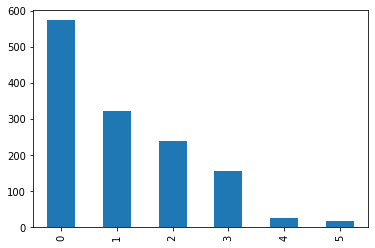

In [129]:
pd.value_counts(insurance_df['children']).plot(kind='bar')

In [130]:
pd.value_counts(insurance_df['children'])

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

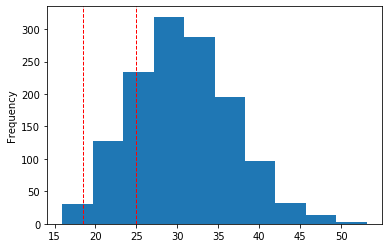

In [131]:
#Plot histogram of BMI along with the normal range of BMI (from the documentation)
insurance_df['bmi'].plot(kind='hist')
plt.axvline(18.5, color='r', linestyle='dashed', linewidth=1)
plt.axvline(24.9, color='r', linestyle='dashed', linewidth=1)

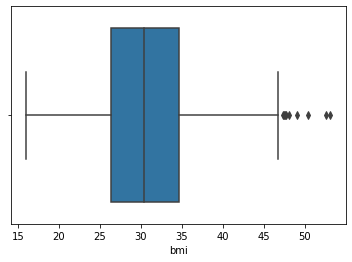

In [132]:
sns.boxplot(insurance_df['bmi'])

BMI distribution looks normal although there are a few high outliers. However, a lot of people have higher BMI than the normal range 18.5 to 24.9 as specified in the documentation.

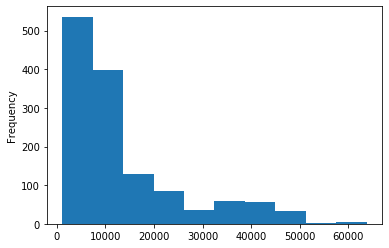

In [133]:
insurance_df['charges'].plot(kind='hist')

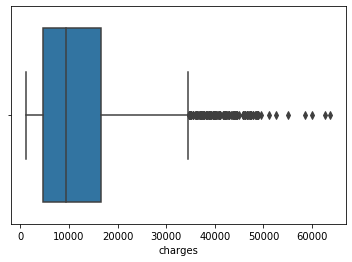

In [134]:
sns.boxplot(insurance_df['charges'])

The distribution of 'Charges' is right skewed as there are high outliers

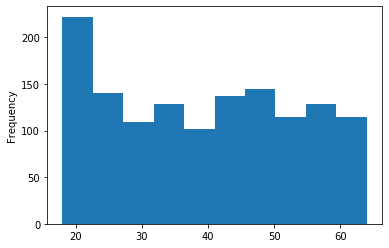

In [135]:
insurance_df['age'].plot(kind='hist')

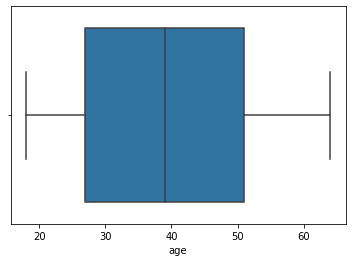

In [136]:
sns.boxplot(insurance_df['age'])

Although Age variable doesn't have any outliers, it's difficult to comment on the type of the distribution. The Age values range from 18 to 64 with a mean of 39.2

In [ ]:
sns.pairplot(insurance_df)

The pairplot is in line with expectations. It also shows that 'Charges' & "Age' have positive correlation. Also, there seem to be 3 categories of 'Charges'. We can investigate this further

### Impact of Smoking on Charges

In [ ]:
smoker_charges = insurance_df[insurance_df['smoker']== 'yes']['charges']
smoker_charges.describe()

In [ ]:
nonsmoker_charges = insurance_df[insurance_df['smoker']== 'no']['charges']
nonsmoker_charges.describe()

In [ ]:
# Grouped boxplot
sns.boxplot(x="sex", y="charges", hue="smoker", data=insurance_df, palette="Set1")


In [ ]:
sns.boxplot(x="smoker", y="charges", data=insurance_df, palette="Set1")

Based on 5 point summary, charges for smokers are higher than that of non-smokers. There are high outliers in non-smokers category with charges as high as the charges for smokers. 

Charges for non-smokers are identical for both male and female whereas median charges are higher for male who smoke

Let's conclude based on T-test for independent samples

assume alpha=0.05

H0 = charges of people who smoke & don't smoke are same

H1 = charges of people who smoke differ significantly from the people who don't

In [ ]:
t_statistic, p_value  =  stats.ttest_ind(smoker_charges,nonsmoker_charges)
print('P Value %1.3f' % p_value)

Since p value is less than alpha, we reject the null hypothesis i.e. statistically there's a sufficient evidence that charges of people who smoke differ significantly from the people who don't

### BMI for males & females

In [ ]:
sns.boxplot(x="sex", y="bmi", data=insurance_df, palette="Set1")

In [ ]:
male_bmi = insurance_df[insurance_df['sex']== 'male']['bmi']
male_bmi.describe()

In [ ]:
female_bmi = insurance_df[insurance_df['sex']== 'female']['bmi']
female_bmi.describe()

From the visual inspection, the BMI difference for males and females doesn't look large enough. Let's look at statistical evidence

assume alpha=5%

H0 = BMI for males and females are same

H1 = BMI for males and females are significantly different


In [ ]:
t_statistic, p_value  =  stats.ttest_ind(male_bmi,female_bmi)
print('P Value %1.3f' % p_value)

Since pvalue is greater than alpha assumtion, we fail to reject the null hypothesis that BMI for males and females are same

### Distribution of bmi across women with 0/1/2 childeren

In [ ]:
insurance_female_df = insurance_df[insurance_df['sex']== 'female']
sns.boxplot(x="children", y="bmi", data=insurance_female_df, palette="Set1")

In [ ]:
bmi_0 = insurance_female_df[insurance_female_df['children']== 0]['bmi']
bmi_1 = insurance_female_df[insurance_female_df['children']== 1]['bmi']
bmi_2 = insurance_female_df[insurance_female_df['children']== 2]['bmi']

Perform levene test on the data
The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

H0 for Levene test: all input samples are from populations with equal variances

H1 for Levene test: all input samples are from populations with unequal variances

In [ ]:
w,p_value = stats.levene(bmi_0,bmi_1,bmi_2)
p_value

Assuming alpha=5%, since p_value is greater than alpha, we fail to reject the null hypothesis. Hence we assume that all input samples are from populations with equal variances.

Now let's perform Anova test

H0 = distribution of bmi across women with no children, one child and two children is the same

H1 = distribution of bmi across women with no children, one child and two children isn't the same

In [ ]:
w,p_value = stats.f_oneway(bmi_0,bmi_1,bmi_2)
p_value

Assuming 5% alpha, since p-value > alpha, we fail to reject the null hypothesis. Hence the distribution of bmi across women with no children, one child and two children is the same

### Proportion of smokers in males & females

In [ ]:
insurance_male_df = insurance_df[insurance_df['sex']== 'male']
male_smokers = insurance_male_df[insurance_male_df['smoker'] == 'yes']['smoker'].count()
total_male = insurance_male_df['smoker'].count()
p_male = male_smokers/total_male
female_smokers = insurance_female_df[insurance_female_df['smoker'] == 'yes']['smoker'].count()
total_female = insurance_female_df['smoker'].count()
p_female = female_smokers/total_female
p_total = (male_smokers+female_smokers)/(total_male+total_female)

Assume alpha=5%

H0 = proportion of smokers is same in differet genders

H1 = proportion of smokers is different in differet genders

In [ ]:
numerator = p_male - p_female
denominator = math.sqrt(p_total * (1-p_total) * (1/total_male + 1/total_female))
zscore = numerator/denominator
zscore

In [ ]:
p_value = 1-0.9978 #based on zscore table (2.8,0.05)
p_value

since pvalue is less than alpha, we reject the null hypothesis. Hence, proportion of smokers is different in differet genders